In [1]:
import matplotlib
matplotlib.use('nbagg')
import yaggie
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Linking Positions into Trajectories

## Introduction

This notebook talks about how to use `yaggie.track` to link tracking results into trajectories

After tracking, typically we get a list, which contains positiosn of particles at different frames.

It looks like this

`[arr(number_2, dimension), ... , arr(number_i, dimension), ...]`

The link engine would link the positions into *trajectories*, a single trajectory looks like this

`{'time': [frame_1, frame_2, ...], 'position': [xyz_1, xyz_2, ...]}`

## Generate Random Data

Here we generated some randomly moving particles. The data to be tracked is `real_positions`, whose shape looks like `(time, number, dimension)`.

Notice different frames have different number of particles. This is common in practical tracking, because of tracking errors.

In [2]:
frames = 50
speed = 2

np.random.seed(6)
numbers = np.random.randint(5, 8, 50)
time_points = np.random.permutation(frames) 

full_positions = [np.zeros((8, 3))] 
real_positions = [full_positions[-1]]  # some particles missing

for f in range(frames - 1): 
    prev = full_positions[-1]
    current = prev + np.random.normal(0, speed, prev.shape)
    full_positions.append(current)
    real_positions.append(np.random.permutation(current)[:numbers[f]])

Let's see how the movement looks like, notices the tracking error

<IPython.core.display.Javascript object>


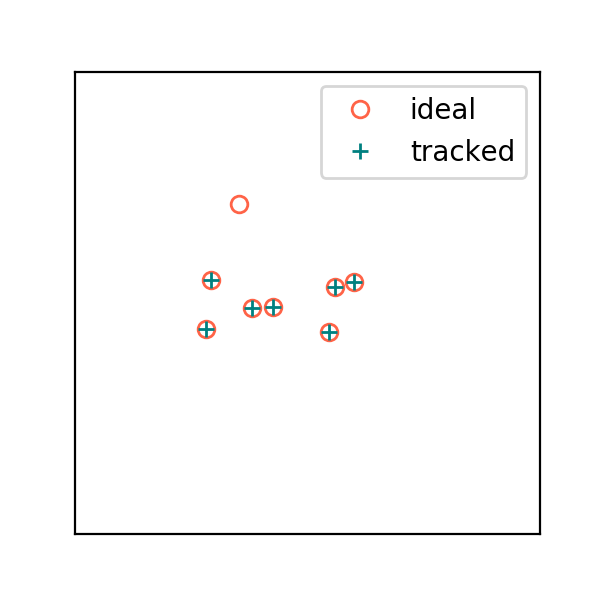

In [3]:
fig, ax = plt.subplots()
s1, = ax.plot([], [], 'bo', color='tomato', markerfacecolor='w', label='ideal')
s2, = ax.plot([], [], 'b+', color='teal', markerfacecolor='w', label='tracked')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_xticks([])
ax.set_yticks([])
fig.set_size_inches(3, 3)
plt.legend(loc='upper right')

def run(frame):
    # update the data
    x1, y1, z1 = full_positions[frame].T
    x2, y2, z2 = real_positions[frame].T
    s1.set_data(x1, y1)
    s2.set_data(x2, y2)
    return s1, s2

ani = animation.FuncAnimation(fig, run, frames=frames, repeat=False, interval=25)

plt.show()
plt.close()

## Link The positions

We use `yaggie.track.TrackpyEngine` to link the positions. The parameters to change are:

- `max_movement`: if two points' distance was larger than this value, they are not allowed to be linked
- `memory`: points were allowed to vanish for several frames

A proper choice of `max_movement` and `memory` leads to a good linking.

**Try to change the two values so that you get 8 trajectories finally**

In [4]:
te = yaggie.track.TrackpyEngine(max_movement=20, memory=8)
trajs = te.run(real_positions, time_points)
print("%s trajectories found!" % len(trajs))

Frame 49: 7 trajectories present.
8 trajectories found!


## Visualise the tracking result

The following command helps to plot the trajectories in 3D

<IPython.core.display.Javascript object>


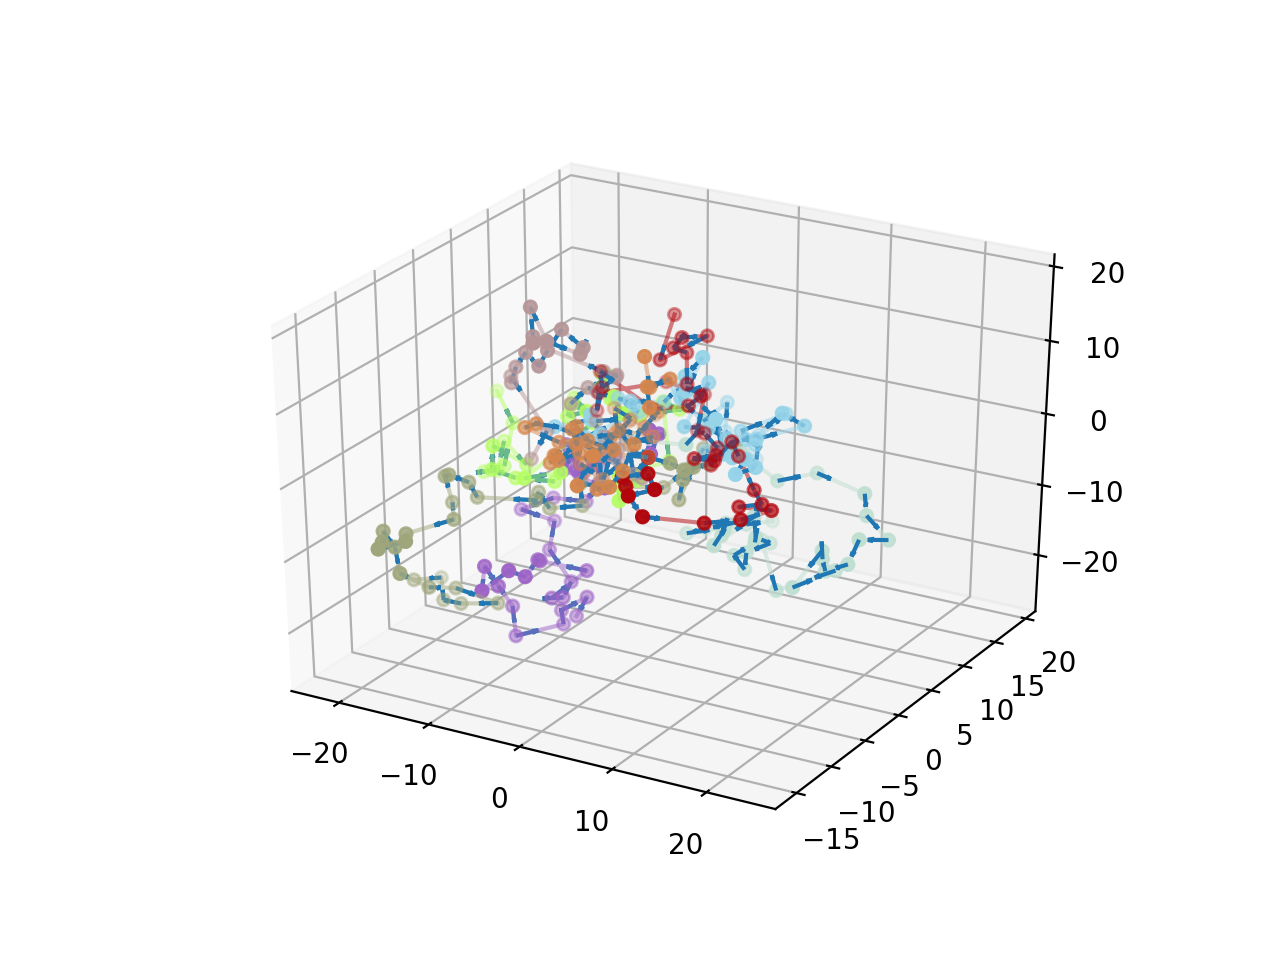

In [5]:
yaggie.utility.plot_trajectories(trajs, projection=False)
plt.close()